<h1><center>HW 2: Scrape Book Reviews</center></h1>

Choose one of your favorite book at goodreads.com (e.g. for the book "The Midninght Library", the URL is: https://www.goodreads.com/book/show/52578297-the-midnight-library?from_choice=true)

- Q1. Write a function to scrape all **reviews on the first page**, including, 
    - **reviewer's name** (see (1) in Figure)
    - **rating** (see (2) in Figure)
    - **date** (see (3) in Figure)
    - **review content** (see (4) in Figure. For each review text, need to get the **complete text**, i.e., need to expand the `more` button. Only text is needed, pictures are not needed. (Hint: take a close look at the content of the html file. Do you need Selenium?)
    - **likes** (see (5) in Figure). 
    - If a field, e.g. rating, is missing, use `None` to indicate it. 
- `Function Input`: book page URL
- `Function Output`: save all reviews as a DataFrame of columns (`reviewer, rating, date, review, like`). E.g., for the given URL, you can get 30 reviews.
- 10 points: 1 point for each element, 5 points for overall logic.
- **Note**: GoodReads occasionaly blocks request. You may get an error that is not due to your codes. You may try to run a couple of times. 
    
    
![alt text](GoodReads.png "GoodReads")

In [ ]:
import requests
from bs4 import BeautifulSoup  
import pandas as pd

def getReviews(page_url):
    
    # enter your codes here
    page = requests.get(page_url)
    samples = []

    if page.status_code==200: 

        soup = BeautifulSoup(page.content, 'html.parser')

        reviews_raw = soup.find_all('div', class_='left bodycol')
        
        for rw in reviews_raw:
            
            name = rw.select("a.user")[0].text
            rating = rw.find_all('span', class_= " staticStars notranslate")[0]['title'] if rw.find_all('span', class_= " staticStars notranslate") else None
            date = rw.find_all('a', class_="reviewDate createdAt right")[0].text
            review = rw.find_all('div', class_='reviewText stacked')[0].text.strip()
            like = rw.find_all('span', class_='likesCount')[0].text.split(' ')[0]

            samples.append((name, rating, date, review, like))

    reviews = pd.DataFrame(samples, columns=['reviewer','rating','date','review','like'],dtype=str)
    return reviews 
    

In [ ]:
# enter your url
page_url = 'https://www.goodreads.com/book/show/52578297-the-midnight-library?from_choice=true'
reviews = getReviews(page_url)
reviews 

,reviewer,rating,date,review,like
0,Nataliya,it was ok,"Jan 04, 2021",I liked this book until it suddenly decided to...,2702
1,Nicole,it was ok,"Nov 20, 2020",Everybody probably knows the premise of this b...,862
2,Nilufer Ozmekik,it was amazing,"Aug 21, 2020",Okay! No more words! This is one of the best s...,2954
3,Paromjit,it was amazing,"May 28, 2020",It is no secret that Matt Haig has mental heal...,1634
4,emma,liked it,"Oct 12, 2020",Okay. Picture this: you are about to bite into...,1700
5,Jayme,liked it,"Nov 21, 2020",Unpopular opinion! In between life and death i...,861
6,Emily (Books with Emily Fox),it was amazing,"Feb 28, 2020","(4.5?) After loving The Humans, I was very exc...",1565
7,Ruby Granger,it was amazing,"Feb 25, 2021",okay WOW. This was amazing.I must say that I w...,653
8,Cindy,it was ok,"Aug 18, 2021",Corny like a Hallmark movie and probably the l...,2047
9,Emily B,liked it,"Sep 20, 2020",This was cute and the concept was great but un...,1103


- Q2 (Bonus). Modify the function you defined in Q1 to scrape **reviews on all the pages** for your url. Since a book may have multiple pages, use the **next** button at the end of each page (shown in the picture) to navigate to the next page. Continue scraping all the pages until the last page. `Please don't hardcode the pages in the URL because the number of pages varies by book`. (3 points. If URL is hardcoded, -2).

![alt text](GoodReads_bonus.png "GoodReads_bonus")

In [ ]:
def getReviews_2(page_url):
    reviews=[]
    while True:
        page = requests.get(page_url)
        soup = BeautifulSoup(page.content, 'html.parser')
        try:
            link = soup.find_all('a', class_="next_page")[0]["onclick"].split(",")[0][18:-1]
            reviews.append(page_url)
            page_url = "https://www.goodreads.com/book/show" + link[13:]
            
        except:
            break

    # enter your codes here
    return reviews             

In [ ]:
# enter your url
page_url = 'https://www.goodreads.com/book/show/52578297-the-midnight-library?from_choice=true'
reviews 


,reviewer,rating,date,review,like
0,Nataliya,it was ok,"Jan 04, 2021",I liked this book until it suddenly decided to...,2702
1,Nicole,it was ok,"Nov 20, 2020",Everybody probably knows the premise of this b...,862
2,Nilufer Ozmekik,it was amazing,"Aug 21, 2020",Okay! No more words! This is one of the best s...,2954
3,Paromjit,it was amazing,"May 28, 2020",It is no secret that Matt Haig has mental heal...,1634
4,emma,liked it,"Oct 12, 2020",Okay. Picture this: you are about to bite into...,1700
5,Jayme,liked it,"Nov 21, 2020",Unpopular opinion! In between life and death i...,861
6,Emily (Books with Emily Fox),it was amazing,"Feb 28, 2020","(4.5?) After loving The Humans, I was very exc...",1565
7,Ruby Granger,it was amazing,"Feb 25, 2021",okay WOW. This was amazing.I must say that I w...,653
8,Cindy,it was ok,"Aug 18, 2021",Corny like a Hallmark movie and probably the l...,2047
9,Emily B,liked it,"Sep 20, 2020",This was cute and the concept was great but un...,1103


**All 300 reviews in on the execution**

In [ ]:
reviews = pd.concat([getReviews(url) for url in getReviews_2(page_url)], ignore_index=True)
reviews 
# the number of reviews vary since all the pages have to load, in one of the instance I was able to get all the 300 rows

,reviewer,rating,date,review,like
0,Nataliya,it was ok,"Jan 04, 2021",I liked this book until it suddenly decided to...,2702
1,Nicole,it was ok,"Nov 20, 2020",Everybody probably knows the premise of this b...,862
2,Nilufer Ozmekik,it was amazing,"Aug 21, 2020",Okay! No more words! This is one of the best s...,2954
3,Paromjit,it was amazing,"May 28, 2020",It is no secret that Matt Haig has mental heal...,1634
4,emma,liked it,"Oct 12, 2020",Okay. Picture this: you are about to bite into...,1700
...,...,...,...,...,...
115,☘Misericordia☘ ⚡ϟ⚡⛈⚡☁ ❇️❤❣,it was amazing,"Mar 19, 2021",Q: Nora had no idea what success was. She had ...,64
116,ABookwormWithWine,it was amazing,"Oct 22, 2020","I&aposll be honest, I have Matt Haig&aposs pre...",70
117,NILTON TEIXEIRA,liked it,"Oct 27, 2020",5 stars for the concept.3 stars for the develo...,60
118,Jenny (Reading Envy),liked it,"Oct 28, 2020",CW for suicidal ideationNora Seed decides to d...,59


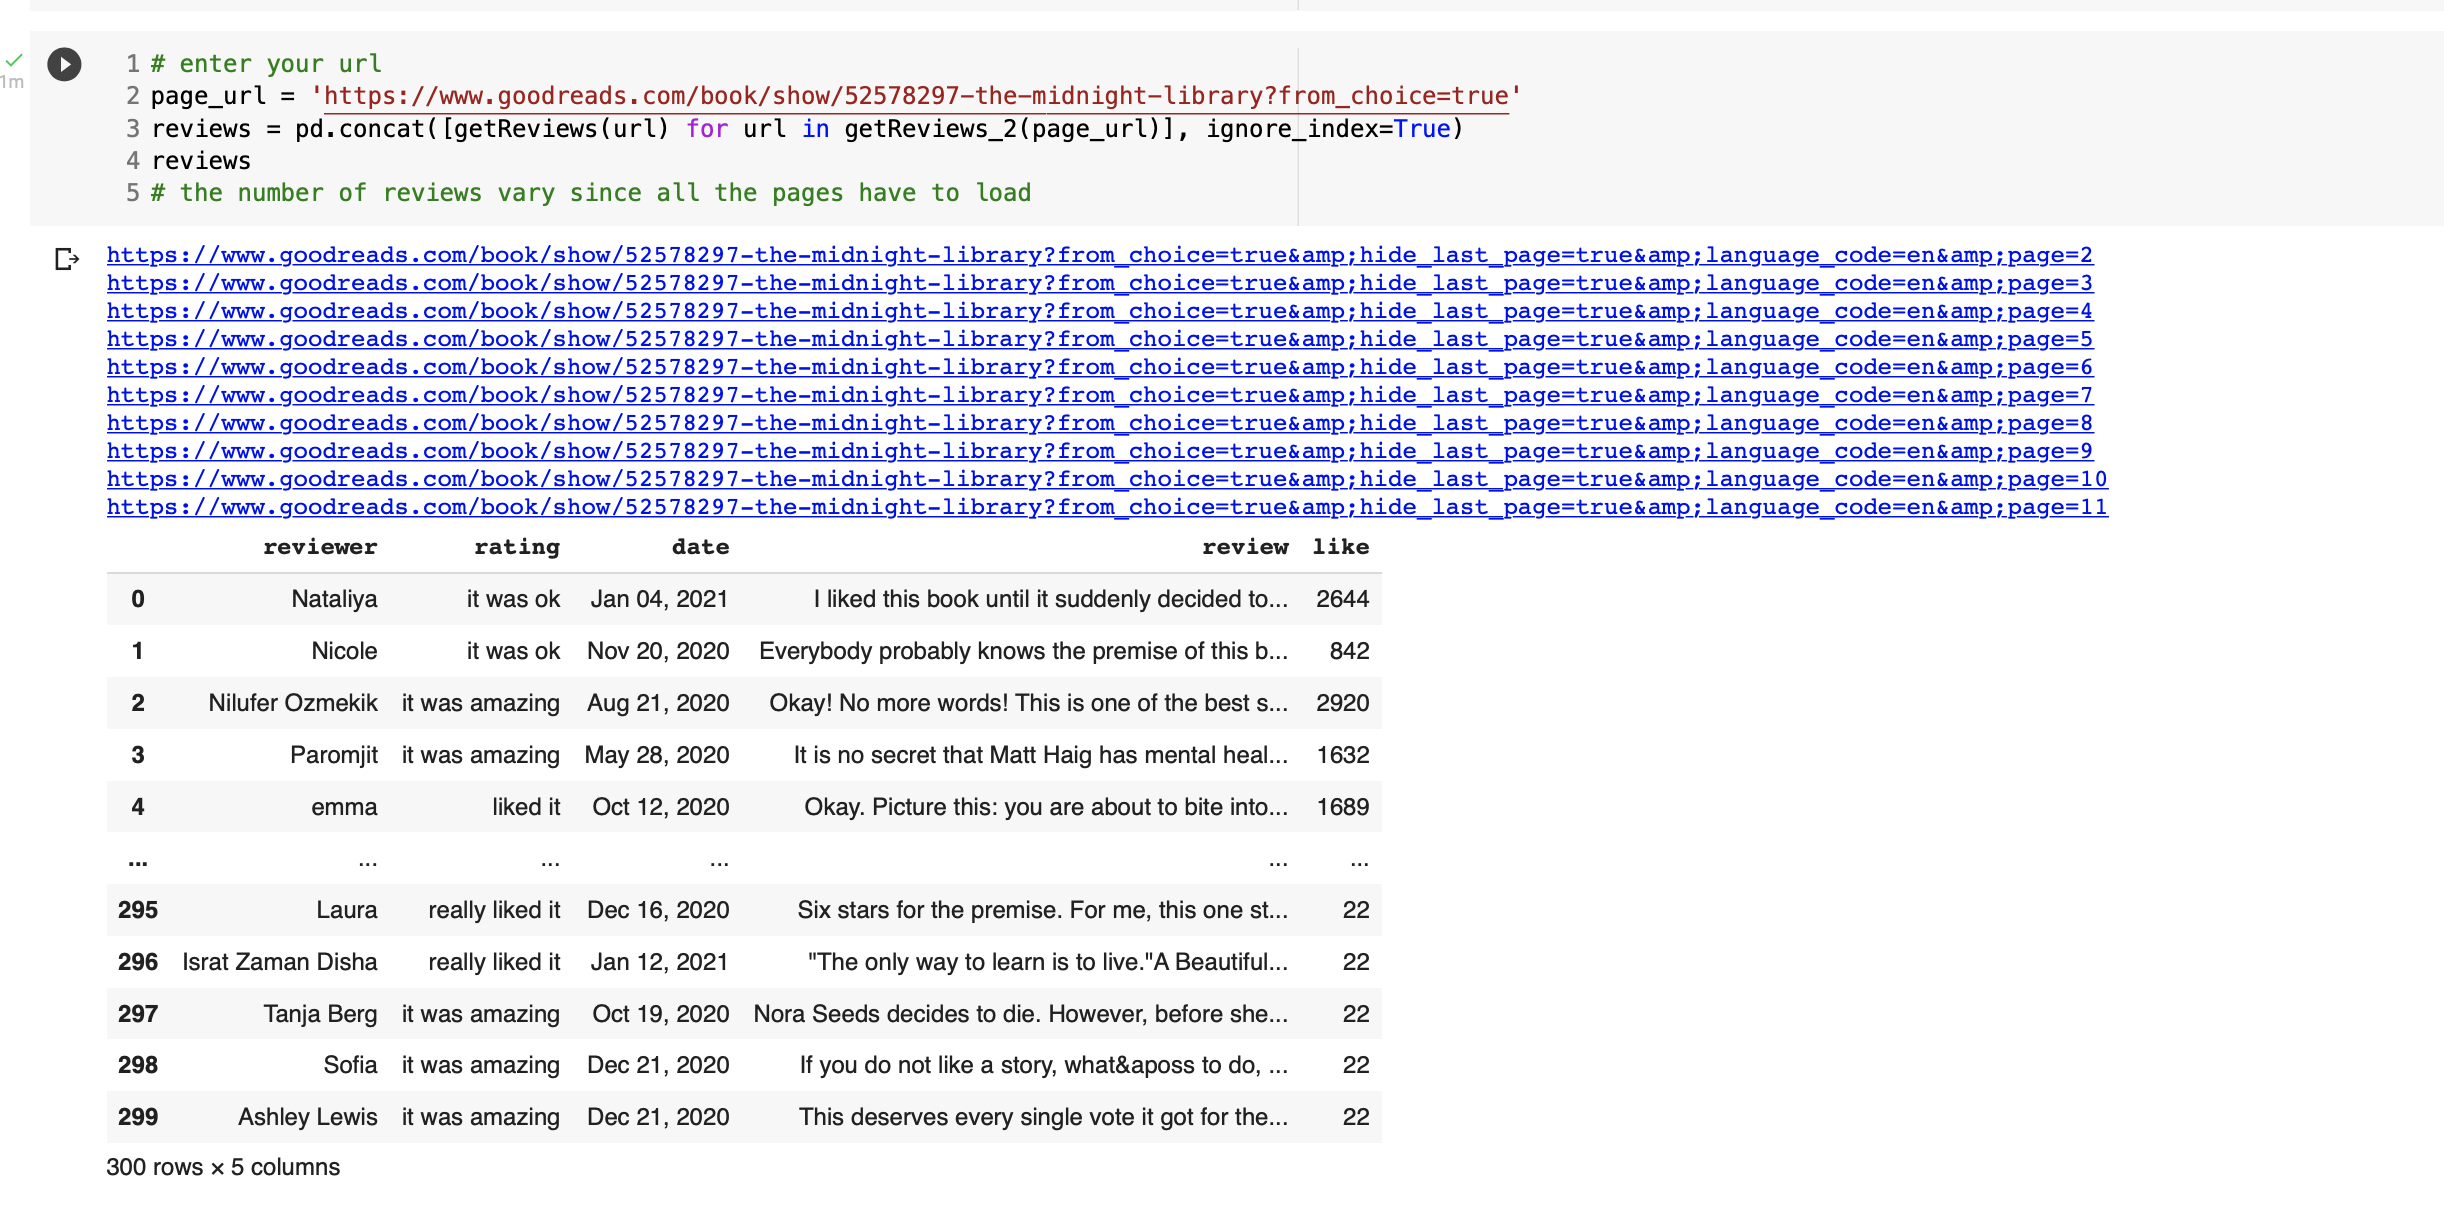